In [1]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam
from keras.utils.np_utils import to_categorical
import random

Seed our random number generator so that we can get reproducible results:

In [2]:
np.random.seed(0)

Load the MNIST training and test data:

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

Look at the shape of the data:

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape[0])

(60000, 28, 28)
(10000, 28, 28)
60000


Verify that our dataset was imported correctly:

In [5]:
assert(X_train.shape[0] == y_train.shape[0]), "The number of images is not equal to the number of labels."
assert(X_test.shape[0] == y_test.shape[0]), "The number of images is not equal to the number of labels."
assert(X_train.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"
assert(X_test.shape[1:] == (28,28)), "The dimensions of the images are not 28x28"

Plot and analyze our data:

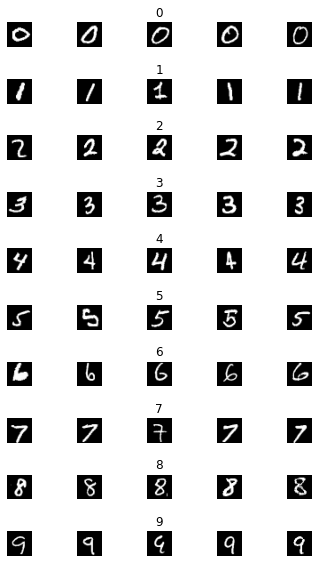

In [6]:
num_of_samples = []
 
cols = 5
num_classes = 10
 
fig, axs = plt.subplots(nrows=num_classes, ncols = cols, figsize=(5, 8))
fig.tight_layout()

for i in range(cols):
    for j in range(num_classes):
        x_selected = X_train[y_train == j]
        
        axs[j][i].imshow(x_selected[random.randint(0, len(x_selected - 1)), :, :], cmap=plt.get_cmap("gray"))
        axs[j][i].axis("off")
        
        if i == 2:
            axs[j][i].set_title(str(j))
            num_of_samples.append(len(x_selected))

[5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949]


Text(0, 0.5, 'Number of images')

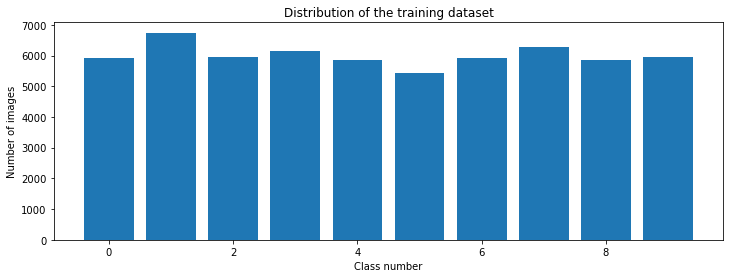

In [7]:
print(num_of_samples)

plt.figure(figsize=(12, 4))
plt.bar(range(0, num_classes), num_of_samples)
plt.title("Distribution of the training dataset")
plt.xlabel("Class number")
plt.ylabel("Number of images")

We must one-hot-encode our data:

In [8]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

Now, we must normalize our data:

In [9]:
X_train = X_train/255 
X_test = X_test/255

Next, we ned to flatten our data to a single row of 784 (i.e., 28x28) pixels:

In [10]:
num_pixels = 784
X_train = X_train.reshape(X_train.shape[0], num_pixels)
X_test = X_test.reshape(X_test.shape[0], num_pixels)

In [11]:
def create_model():
    model = Sequential()
    
    model.add(Dense(10, input_dim=num_pixels, activation='relu'))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(Adam(lr=0.01), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [12]:
model = create_model()
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                310       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,600
Trainable params: 8,600
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
history = model.fit(X_train, 
                    y_train, 
                    validation_split=0.1, 
                    epochs = 10, 
                    batch_size = 200, 
                    verbose = 1, 
                    shuffle = 1)

Epoch 1/10
270/270 [==============================] - 1s 3ms/step - loss: 0.9701 - accuracy: 0.6651 - val_loss: 0.2472 - val_accuracy: 0.9255
Epoch 2/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2935 - accuracy: 0.9130 - val_loss: 0.2216 - val_accuracy: 0.9348
Epoch 3/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2510 - accuracy: 0.9253 - val_loss: 0.2037 - val_accuracy: 0.9413
Epoch 4/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2285 - accuracy: 0.9311 - val_loss: 0.1997 - val_accuracy: 0.9412
Epoch 5/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2173 - accuracy: 0.9343 - val_loss: 0.2007 - val_accuracy: 0.9410
Epoch 6/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2045 - accuracy: 0.9399 - val_loss: 0.1958 - val_accuracy: 0.9432
Epoch 7/10
270/270 [==============================] - 0s 1ms/step - loss: 0.2049 - accuracy: 0.9385 - val_loss: 0.1798 - val_accuracy: 0.9460
Epoch 

Text(0.5, 0, 'epoch')

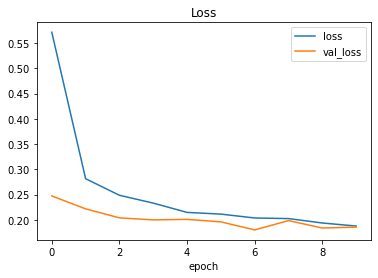

In [14]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.title('Loss')
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

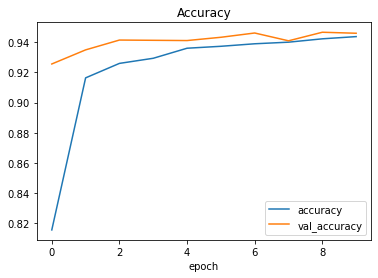

In [15]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.title('Accuracy')
plt.xlabel('epoch')

In [16]:
score = model.evaluate(X_test, y_test, verbose=0)

print(type(score))
print('Test score:', score[0])
print('Test accuracy:', score[1])

<class 'list'>
Test score: 0.2241087406873703
Test accuracy: 0.9368000030517578


# Test the model on an image it has not seen yet

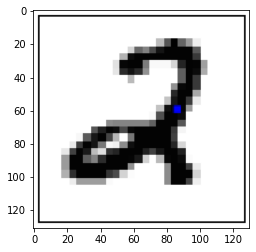

In [17]:
import requests
from PIL import Image
 
url = 'https://colah.github.io/posts/2014-10-Visualizing-MNIST/img/mnist_pca/MNIST-p1815-4.png'
response = requests.get(url, stream=True)
img = Image.open(response.raw)
plt.imshow(img, cmap=plt.get_cmap('gray'))

We need to access this image as a numpy array. Then, we need to resize the image to be a 28x28 image, as we have with the training data.

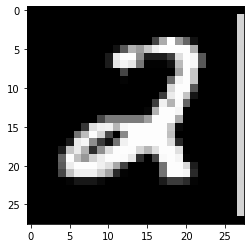

In [18]:
import cv2
 
img = np.asarray(img)
img = cv2.resize(img, (28, 28))
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = cv2.bitwise_not(img) # invert the image colors, because we need a white image on a black background

plt.imshow(img, cmap=plt.get_cmap('gray'))

Normalize the image, and flatten it, as we did with the training data.

In [19]:
img = img/255
img = img.reshape(1, 784)

Make a prediction:

In [20]:
prediction = model.predict_classes(img)
print("predicted digit:", str(prediction))

predicted digit: [2]


/Users/kenpower/opt/anaconda3/envs/DeepLearning/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
